Build Sinusoidal PE step by step and explain its properity

In [24]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
class SinusoidalPE(nn.Module):
    def __init__(self, d_model, max_len=10000):
        super().__init__()
        positional_encodings = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1) #shape:(max_len, 1)
        div_term = torch.exp(-torch.arange(0, d_model, 2) / d_model * math.log(10000.0)) #shape: (d_model / 2, )
        positional_encodings[:, 0::2] = torch.sin(position * div_term)
        positional_encodings[:, 1::2] = torch.cos(position * div_term)
        positional_encodings = positional_encodings.unsqueeze(0) #shape: (1, max_len, d_model)
        self.register_buffer('positional_encodings', positional_encodings) #used for save positional_encodings

    def forward(self, x):
        #x shape:(N, L, D), (batch_size, length, dim)
        return self.positional_encodings[:, :x.size(1)]

In [8]:
pos = SinusoidalPE(128)
x = torch.randn((1, 32, 128))
pe = pos(x)

<Axes: >

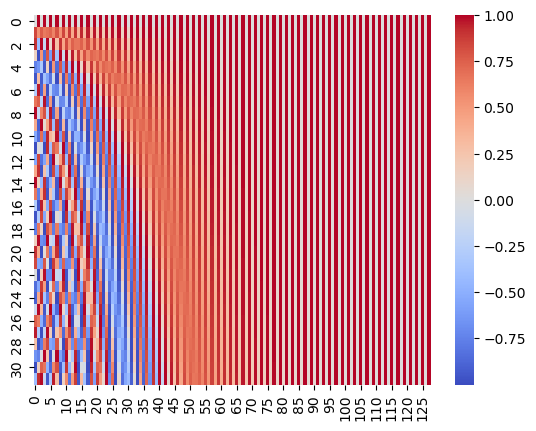

In [20]:
sns.heatmap(pe[0], cmap='coolwarm')

Properity 1:
relative distance: The dot product of different position encodings is only relative to its distance

<Axes: >

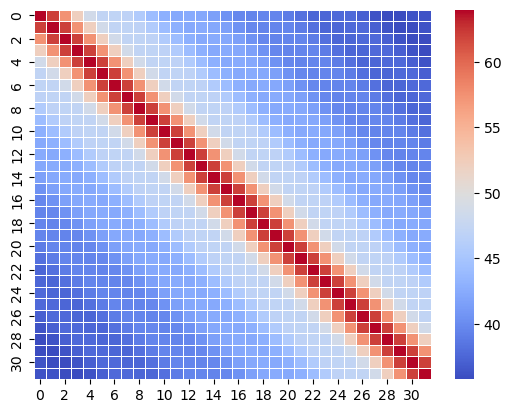

In [21]:
dot_product = torch.matmul(pe[0], pe[0].T)
sns.heatmap(dot_product, cmap='coolwarm', linewidth=0.5)

Properity 2:
Long-term decay: With the distance k larger, the dot product becomes smaller.But not happen after mutiply with weight matrix(That's why use ROPE)

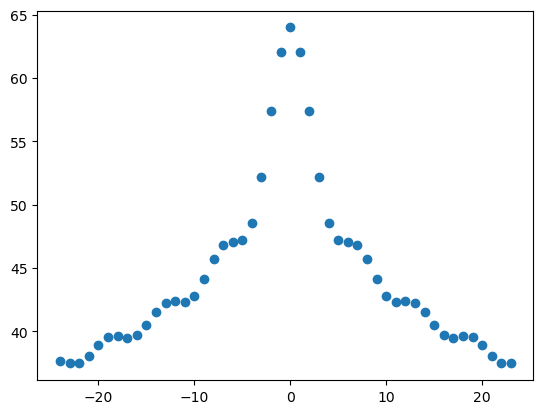

In [26]:
dot_product = torch.matmul(pe[0], pe[0].T)
avg_product = []
for k in range(-24, 24):
    avg_product.append(dot_product.diagonal(offset=k).mean().item())
plt.scatter(x=np.arange(-24, 24), y=avg_product)

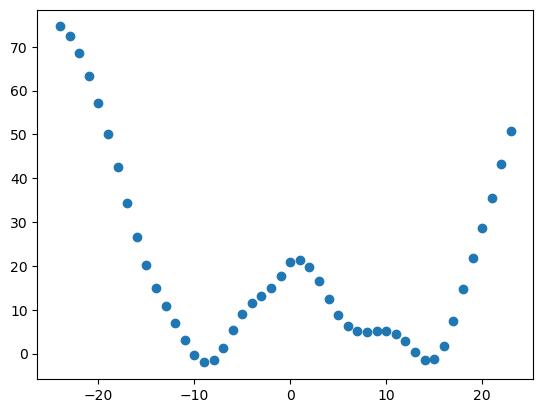

In [42]:
weight_matrix = torch.randn(pe[0].size(-1), pe[0].T.size(0))
dot_product = pe[0] @ weight_matrix @ pe[0].T
avg_product = []
for k in range(-24, 24):
    avg_product.append(dot_product.diagonal(offset=k).mean().item())
plt.scatter(x=np.arange(-24, 24), y=avg_product)